# Angular Inflation with Anguelova

In [16]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor, RicciScalar

#import inflatox
import inflatox

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

⎡      6⋅α                         ⎤
⎢────────────────         0        ⎥
⎢               2                  ⎥
⎢⎛   2    2    ⎞                   ⎥
⎢⎝- χ  - φ  + 1⎠                   ⎥
⎢                                  ⎥
⎢                        6⋅α       ⎥
⎢       0          ────────────────⎥
⎢                                 2⎥
⎢                  ⎛   2    2    ⎞ ⎥
⎣                  ⎝- χ  - φ  + 1⎠ ⎦

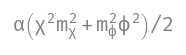

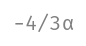

In [18]:
sympy.init_printing()
#setup the coordinates
p, x = sympy.symbols("phi chi")
coords = [p, x]
d = len(coords)

#setup the potential
mp, mx, a = sympy.symbols("m_phi m_chi alpha")
V = a/2 * ( (mp*p)**2 + (mx*x)**2 ).nsimplify()

#setup the metric
metric_diagonal = 6*a / (1 - p**2 - x**2)**2
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = metric_diagonal
metric[1][1] = metric_diagonal
metric = MetricTensor(metric, coords)
R = RicciScalar.from_metric(metric).simplify()

#display the metric and potential
display(metric.tensor(), V, R)

In [19]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
  assertions=False,
  simplification_depth=1,
  silent=True
).execute([[0,1]])

Calculating covariant Hesse matrix...
Projecting the Hesse matrix on the vielbein basis...


In [20]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
chi -> x[1]
alpha -> args[0]
m_chi -> args[1]
m_phi -> args[2]


In [6]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

a = 1/600
m_phi = 2e-5
m_chi = m_phi * np.sqrt(9)
args = np.array([a, m_chi, m_phi])

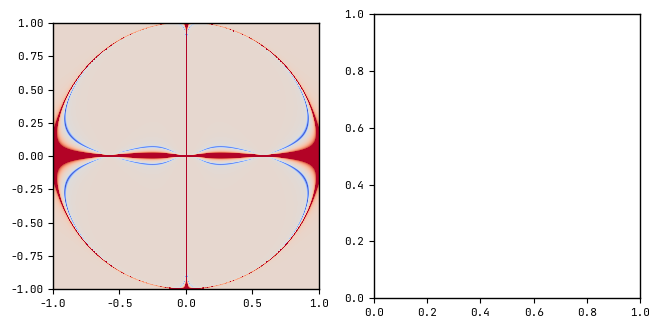

In [7]:
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(cmap(1.0))

fig, (ax1, ax2) = plt.subplots(1,2,
  figsize=FULL_FIG(0.5),
  width_ratios=[1, 1]
)

extent1 = (-1.0, 1.0, -1.0, 1.0)
array1 = anguelova.evaluate(args, *extent1)
img = ax1.imshow(
  array1,
  extent=extent1,
  cmap=cmap,
  norm=two_norm
)
del array1

In [8]:
extent2 = (0.0, 1.0, 0.0, 1.0)
array2 = anguelova.evaluate(args, *extent2)
img = ax2.imshow(
  array2,
  extent=extent2,
  cmap=cmap,
  norm=two_norm,
  origin='lower'
)
del array2

In [9]:
#Make colorbar
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(
  img,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

ax1.set_ylabel(f'${sympy.latex(coords[1])}$')
ax1.set_xlabel(f'${sympy.latex(coords[0])}$')

ax2.set_ylabel(f'${sympy.latex(coords[1])}$')
ax2.set_xlabel(f'${sympy.latex(coords[0])}$')

Text(0.5, 4.444444444444445, '$\\phi$')

<Figure size 640x480 with 0 Axes>

In [10]:
fig.savefig('../out/angular.svg', transparent=True, bbox_inches="tight", pad_inches=0.05)
fig.show()

/tmp/ipykernel_9192/3517004993.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
